In [ ]:
import quantiacsToolbox
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import linear_model
from sklearn.preprocessing import PolynomialFeatures
%matplotlib inline

In [8]:
#reading file 
F_AD = pd.read_csv(r'/home/anshul/Desktop/Quantiacs/tickerData/F_AD.txt')

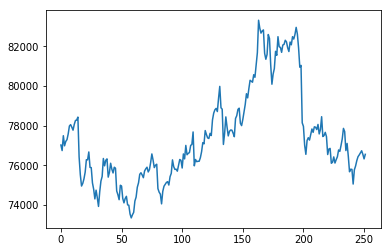

In [9]:
#getting t
CLOSE = np.array(F_AD.loc[:252-1, [' CLOSE']])
plt.plot(CLOSE)

In [ ]:
poly = PolynomialFeatures(degree=5)
X = poly.fit_transform(np.arange(252).reshape(-1, 1))
y = CLOSE[:]

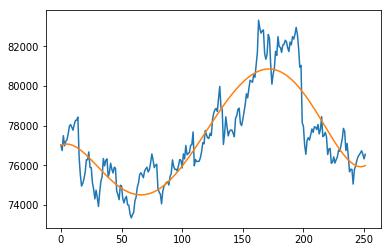

In [6]:
reg = linear_model.LinearRegression()
reg.fit(X, y)
plt.plot(y)
plt.plot(reg.predict(X))

In [ ]:
reg.predict(poly.fit_transform(np.array([[252]])))

In [ ]:
F_AD.loc[252, [' CLOSE']]

In [ ]:
class myStrategy(object):

    def myTradingSystem(self, DATE, OPEN, HIGH, LOW, CLOSE, VOL, OI, P, R, RINFO, exposure, equity, settings):
        """ This system uses linear regression to allocate capital into the desired equities"""

        # Get parameters from setting
        nMarkets = len(settings['markets'])
        lookback = settings['lookback']
        dimension = settings['dimension']
        threshold = settings['threshold']

        pos = np.zeros(nMarkets, dtype=np.float)

        poly = PolynomialFeatures(degree=dimension)
        for market in range(nMarkets):
            reg = linear_model.LinearRegression()
            try:
                reg.fit(poly.fit_transform(np.arange(lookback).reshape(-1, 1)), CLOSE[:, market])
                trend = (reg.predict(poly.fit_transform(np.array([[lookback]]))) - CLOSE[-1, market]) / CLOSE[-1, market]

                if abs(trend[0]) < threshold:
                    trend[0] = 0

                pos[market] = np.sign(trend)

            # for NaN data set position to 0
            except ValueError:
                pos[market] = .0

        return pos, settings


    def mySettings(self):
        """ Define your trading system settings here """

        settings = {}

        # Futures Contracts
        settings['markets'] = ['CASH', 'F_AD', 'F_BO', 'F_BP', 'F_C', 'F_CC', 'F_CD',
                               'F_CL', 'F_CT', 'F_DX', 'F_EC', 'F_ED', 'F_ES', 'F_FC', 'F_FV', 'F_GC',
                               'F_HG', 'F_HO', 'F_JY', 'F_KC', 'F_LB', 'F_LC', 'F_LN', 'F_MD', 'F_MP',
                               'F_NG', 'F_NQ', 'F_NR', 'F_O', 'F_OJ', 'F_PA', 'F_PL', 'F_RB', 'F_RU',
                               'F_S', 'F_SB', 'F_SF', 'F_SI', 'F_SM', 'F_TU', 'F_TY', 'F_US', 'F_W', 'F_XX',
                               'F_YM']

        settings['lookback'] = 252
        settings['budget'] = 10 ** 6
        settings['slippage'] = 0.05

        settings['threshold'] = 0.05
        settings['dimension'] = 3

        return settings

In [ ]:
result = quantiacsToolbox.runts(myStrategy)

copying data from cache
Evaluating Trading System <class '__main__.myStrategy'>


/home/anshul/anaconda3/lib/python3.6/site-packages/quantiacsToolbox/quantiacsToolbox.py:881: RuntimeWarning: invalid value encountered in true_divide
  position = position / np.sum(abs(position))
